In [1]:
import numpy as np
import matplotlib.pyplot as plt

V = np.array([0.25, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

I = np.array([0.003, 0.006, 0.012, 0.024, 0.037, 0.049, 0.062, 0.074, 0.086, 0.099, 0.112, 0.124])

InputV = 0.5

SV1 = 3.973
SV2 = 0.957
SI1 = 0.04
SI2 = 0.04
SR1 = 98.2
SR2 = 23.7
SVtotal = SV1 + SV2
SItotal = SI1
SR1cal = SV1 / SI1
SR2cal = SV2 / SI2
SRtotal = SVtotal / SItotal

#print('Total R series:', SRtotal, 'ohm')

PV1 = 4.682
PV2 = 4.648
PI1 = 0.048
PI2 = 0.2
PR1 = 98.2
PR2 = 23.7
PVtotal = PV1
PItotal = PI1 + PI2
PR1cal = PV1 / PI1
PR2cal = PV2 / PI2
PRtotal = PVtotal / PItotal

#print('Total R parallel:', PRtotal, 'ohm')


R = np.array([80.4,80.4,80.4,80.4,80.4,80.4,80.4,80.4,80.4,80.4,80.4,80.4,])


dV_array = np.array([0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01])

dI = 0.001
dV = 0.01

def ruleFour(Q,consts,deltas,vals):
    dQ = np.abs(Q)*np.sqrt(np.sum((consts*deltas/vals)**2))
    return dQ

const = np.array([1,-1])
delta = np.array([dV,dI])
val = np.array([PVtotal,PItotal])

dPR = ruleFour(PRtotal, const, delta, val)

const = np.array([1,-1])
delta = np.array([dV,dI])
val = np.array([SVtotal,SItotal])

dSR = ruleFour(SRtotal, const, delta, val)


print('Total R series:', SRtotal, '±', dSR, 'ohm')
print('Total R parallel:', PRtotal, '±', dSR, 'ohm')
#print('Error in R serries is:', dSR)

x = I
y = V
dy = dV_array


Total R series: 123.24999999999999 ± 3.0913753512797504 ohm
Total R parallel: 18.87903225806452 ± 3.0913753512797504 ohm


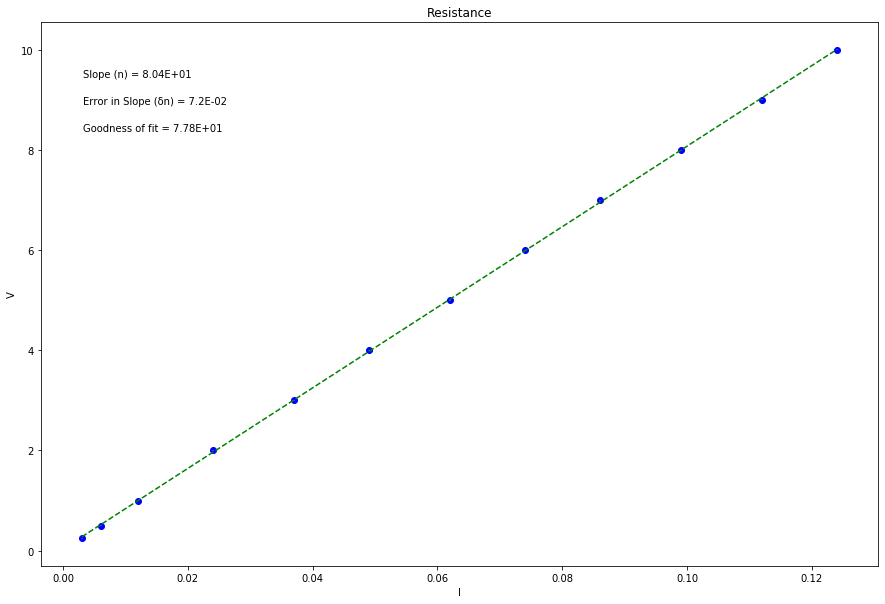

In [2]:
#Plotting code to use the whole year!
#Jaylene Naylor
#September 2015, modified Sept 2017, August 2018
#-------------------------------------------#

#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
#CHANGE THE VARIABLE NAMES and numbers to match your data


#--------------------------------------------#
#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic


#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function

b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('I')
plt.ylabel('V')
plt.title('Resistance')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope (n) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (δn) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()

In [3]:
print('The slope(n) =', m, '±', dm)

The slope(n) = 80.42420621372484 ± 0.07156257244782323
